# **CS 351L - AI Lab**

## **Instructor: Mr. Usama Arshad, PhD CS**
### **BS Cybersecurity - 5th Semester**

---

### **Welcome to the AI Lab Course!**

In this lab, we will explore various concepts in Artificial Intelligence (AI), focusing on practical implementations using Python. You will work on hands-on exercises and projects that will help you understand AI techniques, algorithms, and tools commonly used in the field of AI and cybersecurity.

### **Course Overview:**
- **Course Code:** CS 351L
- **Program:** BS Cybersecurity
- **Semester:** 5th

---



### **CS 351L - AI Lab - Lab 8**


---

### **Learning Objectives:**

By the end of this lab, students will be able to:

1. Understand the concepts of basic Neural Network.
2. Implement basic Neural Network in Python.
3. Explore and apply on different datasets and visualize.



---

### **Let's get started!**

![Alt Text](https://cdn.dribbble.com/users/1523313/screenshots/16134521/media/3975730626bdae63cf9b25d3b634bac3.gif)



# **Lab 8: Basics of Neural Networks - Building, Training, and Evaluating**
---

### **Introduction to Neural Networks**
Neural Networks are inspired by the structure and function of the human brain. They are used in various machine learning tasks such as classification, regression, and more.

Key components of a neural network:
- **Neurons**: The building blocks of the network.
- **Layers**: Input, hidden, and output layers.
- **Activation Functions**: Introduce non-linearity, enabling the network to learn complex patterns.

In this lab, we will build a simple neural network for classifying the Iris dataset.

---
    


## **Importing Required Libraries**
Run the following cell to import the necessary libraries.
    

In [1]:

# Importing necessary libraries
import numpy as np  # For numerical computations
import pandas as pd  # For handling datasets
from sklearn.model_selection import train_test_split  # For splitting data into train/test sets
from sklearn.preprocessing import LabelBinarizer, StandardScaler  # For preprocessing data
from sklearn.metrics import classification_report, ConfusionMatrixDisplay  # For evaluating model performance
import tensorflow as tf  # For building and training the neural network
from tensorflow.keras.models import Sequential  # Sequential model API in Keras
from tensorflow.keras.layers import Dense  # Fully connected layers in Keras
import matplotlib.pyplot as plt  # For visualizations

# Ensuring reproducibility by setting random seeds
np.random.seed(42)
tf.random.set_seed(42)



## **Step 1: Load and Preprocess the Data**
We will use the Iris dataset for classification.
    

In [2]:

# Load the Iris dataset
from sklearn.datasets import load_iris  # Iris dataset is part of scikit-learn
iris = load_iris()  # Load the dataset into memory
X = iris.data  # Features
y = iris.target  # Target labels
target_names = iris.target_names  # Names of target classes

# One-hot encode the labels (convert categorical to binary vectors)
encoder = LabelBinarizer()  # Initialize encoder
y_encoded = encoder.fit_transform(y)  # Fit and transform labels

# Standardize the features (scale to have mean 0 and variance 1)
scaler = StandardScaler()  # Initialize scaler
X_scaled = scaler.fit_transform(X)  # Fit and transform features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# Print the number of samples in training and testing sets
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Training samples: 105, Testing samples: 45



## **Step 2: Build the Neural Network**
We will use the Keras API to build a simple feedforward neural network.
    

In [3]:

# Build the neural network
model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train.shape[1],), name="Hidden_Layer_1"),  # First hidden layer with ReLU activation
    Dense(8, activation='relu', name="Hidden_Layer_2"),  # Second hidden layer with ReLU activation
    Dense(y_train.shape[1], activation='softmax', name="Output_Layer")  # Output layer with softmax for classification
])

# Compile the model
model.compile(optimizer='adam',  # Adam optimizer for efficient training
              loss='categorical_crossentropy',  # Loss function for multi-class classification
              metrics=['accuracy'])  # Metric to evaluate model accuracy

# Display a summary of the model structure
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)               │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_2 (Dense)               │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 139 (556.00 B)

 Trainable params: 139 (556.00 B)

 Non-trainable params: 0 (0.00 B)


## **Step 3: Train the Neural Network**
Visualize the training progress using loss and accuracy plots.
    

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.3477 - loss: 1.2122 - val_accuracy: 0.4762 - val_loss: 1.1133
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.3499 - loss: 1.1674 - val_accuracy: 0.4762 - val_loss: 1.0743
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.3775 - loss: 1.1270 - val_accuracy: 0.4762 - val_loss: 1.0373
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3519 - loss: 1.0896 - val_accuracy: 0.5238 - val_loss: 1.0027
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3814 - loss: 1.0541 - val_accuracy: 0.5238 - val_loss: 0.9694
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4441 - loss: 1.0192 - val_accuracy: 0.5238 - val_loss: 0.9381
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4692 - loss: 0.9849 - val_accuracy: 0.6190 - val_loss: 0.9070
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5497 - loss: 0.9512 - val_accuracy: 0.6667 - val_l

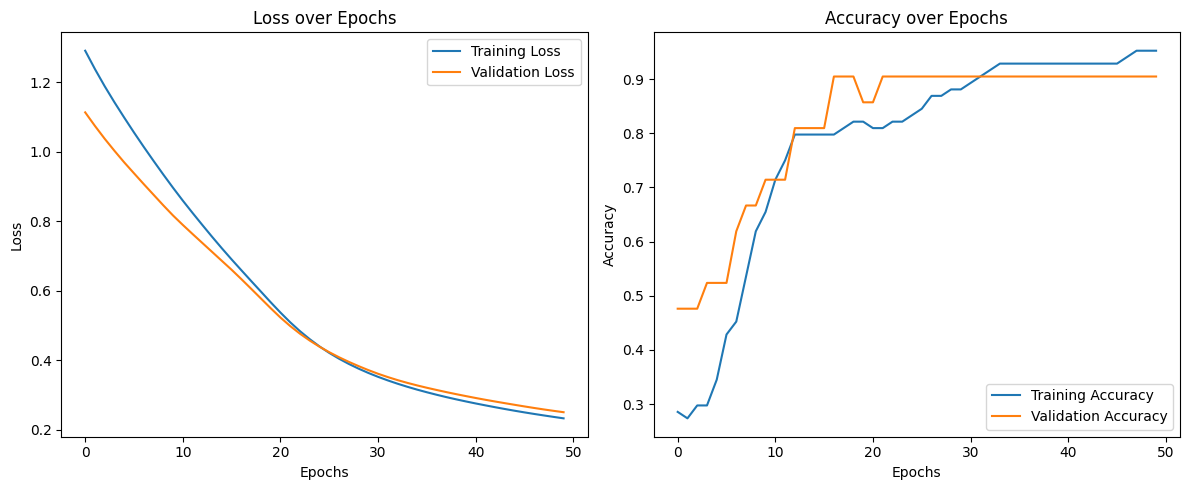

In [4]:

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=8, verbose=1)

# Plot training history
plt.figure(figsize=(12, 5))  # Set figure size

# Loss plot
plt.subplot(1, 2, 1)  # First subplot for loss
plt.plot(history.history['loss'], label='Training Loss')  # Training loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # Validation loss
plt.title('Loss over Epochs')  # Title of the plot
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Loss')  # Y-axis label
plt.legend()  # Display legend

# Accuracy plot
plt.subplot(1, 2, 2)  # Second subplot for accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Training accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Validation accuracy
plt.title('Accuracy over Epochs')  # Title of the plot
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Accuracy')  # Y-axis label
plt.legend()  # Display legend

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Show the plots



## **Step 4: Evaluate the Neural Network**
Evaluate the model on the test data and visualize the confusion matrix.
    

Test Loss: 0.2006, Test Accuracy: 0.9556
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.85      0.92        13
   virginica       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



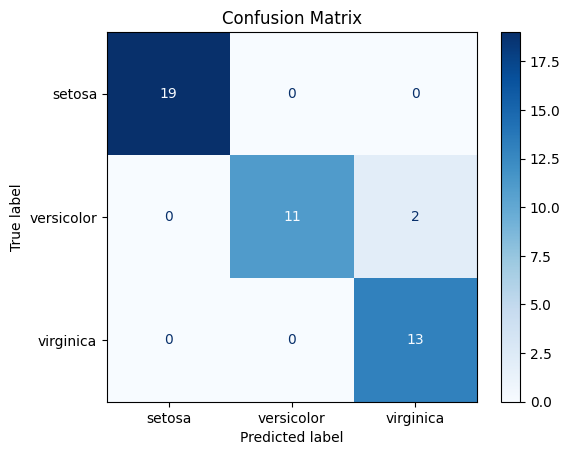

In [6]:

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)  # Evaluate without verbose output
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")  # Print test loss and accuracy

# Generate predictions for test data
y_pred = model.predict(X_test)  # Predicted probabilities for each class
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true_classes = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to class labels

# Print classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=target_names))

# Visualize confusion matrix
ConfusionMatrixDisplay.from_predictions(y_true_classes, y_pred_classes, display_labels=target_names, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()



## **Step 5: Visualize the Neural Network Architecture**
Display the architecture of the neural network using Keras utilities.
    

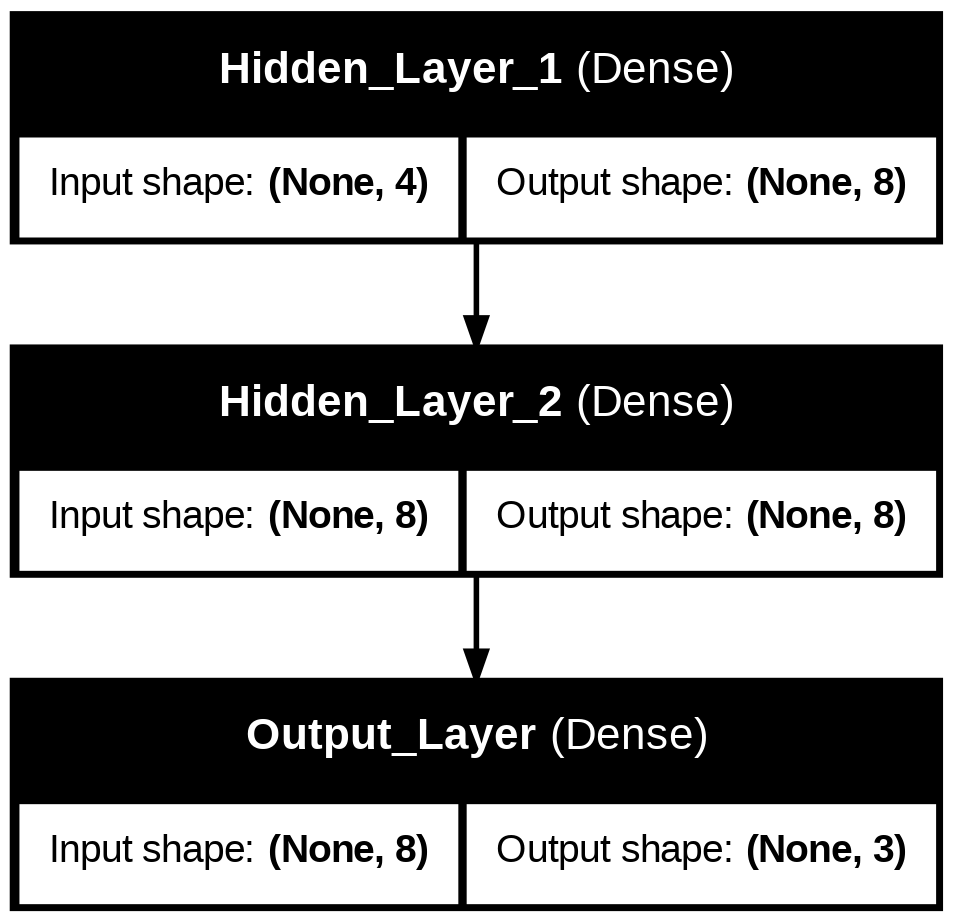

In [7]:

# Visualize the model architecture
from tensorflow.keras.utils import plot_model  # Utility to plot model architecture

# Save the architecture plot
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model_architecture.png')  # Save as PNG

# Display the saved image
from IPython.display import Image
Image(filename='model_architecture.png')



## **Task for Students**
1. Modify the network to include another hidden layer with 16 neurons.
2. Train the modified network and compare its performance with the current one.
3. Use a different dataset (e.g., Wine dataset) and repeat the steps.

---
    